In [1]:
# https://www.datacamp.com/community/tutorials/text-analytics-beginners-nltk

# Text Analysis Operations using NLTK

NLTK is a powerful Python package that provides a set of diverse natural languages algorithms. 

It is free, opensource, easy to use, large community, and well documented. NLTK consists of the most common algorithms such as tokenizing, part-of-speech tagging, stemming, sentiment analysis, topic segmentation, and named entity recognition. 

NLTK helps the computer to analysis, preprocess, and understand the written text.

In [2]:
import nltk

# Tokenization

Tokenization is the first step in text analytics. The process of breaking down a text paragraph into smaller chunks such as words or sentence is called Tokenization. 

Token is a single entity that is building blocks for sentence or paragraph.

### Sentence Tokenization

Sentence tokenizer breaks paragraph text into sentences.

In [3]:
from nltk.tokenize import sent_tokenize
text="""Hello Mr. Smith, how are you doing today?
        The weather is great, and city is awesome.
        The sky is pinkish-blue. 
        You shouldn't eat cardboard
    """
tokenized_text=sent_tokenize(text)
print(tokenized_text)

['Hello Mr. Smith, how are you doing today?', 'The weather is great, and city is awesome.', 'The sky is pinkish-blue.', "You shouldn't eat cardboard"]


### Word Tokenization

Word tokenizer breaks paragraph text into words.

In [4]:
from nltk.tokenize import word_tokenize
tokenized_word=word_tokenize(text)
print(tokenized_word)

['Hello', 'Mr.', 'Smith', ',', 'how', 'are', 'you', 'doing', 'today', '?', 'The', 'weather', 'is', 'great', ',', 'and', 'city', 'is', 'awesome', '.', 'The', 'sky', 'is', 'pinkish-blue', '.', 'You', 'should', "n't", 'eat', 'cardboard']


### Word Cleaning

In most cases, removing punctuation and converting words to lower-case allow for a more robust analysis

In [5]:
import string
def clean_text(text):
    return text.translate(str.maketrans('', '', string.punctuation)).lower()

cleanText = clean_text(text)
print(cleanText)

hello mr smith how are you doing today
        the weather is great and city is awesome
        the sky is pinkishblue 
        you shouldnt eat cardboard
    


In [6]:
tokenized_word=word_tokenize(cleanText)
print(tokenized_word)

['hello', 'mr', 'smith', 'how', 'are', 'you', 'doing', 'today', 'the', 'weather', 'is', 'great', 'and', 'city', 'is', 'awesome', 'the', 'sky', 'is', 'pinkishblue', 'you', 'shouldnt', 'eat', 'cardboard']


# Frequency Distribution

Once tokenized, we can determine word frequencies

In [7]:
from nltk.probability import FreqDist
fdist = FreqDist(tokenized_word)
print(fdist)

<FreqDist with 20 samples and 24 outcomes>


In [8]:
fdist.most_common(2)

[('is', 3), ('you', 2)]

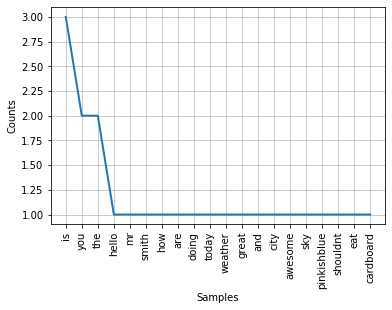

In [30]:
# Frequency Distribution Plot
import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()

# Stopwords

Stopwords are considered noise in the text. Text may contain "stopwords" such as is, am, are, this, a, an, the, etc.

In NLTK, to remove stopwords, you need to create a list of stopwords and filter out your list of tokens from these words.

In [10]:
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))
print(stop_words)

{'hers', 'themselves', 'but', 'again', "shouldn't", 'until', 'he', 'ain', 'weren', 'few', 'not', 'over', 'about', 'ourselves', "didn't", 'there', 'when', 'won', 'me', 'or', 'under', 'it', 'have', 'm', 'hasn', "haven't", 'up', "aren't", 'those', 'her', 'after', 'yourself', 'because', "weren't", 'these', 're', 'and', 'they', 'haven', "won't", 'will', 'yourselves', 'couldn', 'having', 'did', 'yours', 'how', 'needn', 'only', 'd', "mustn't", "should've", 'same', 'shouldn', 'just', "couldn't", 'aren', 'down', 'the', 'here', 'why', 'own', 'out', 'from', 'which', "she's", "isn't", 've', "that'll", 'wouldn', 'them', 'mustn', 'do', 'nor', 'if', 'that', 'as', 'too', 'is', 'more', 'its', 'him', 'at', 'further', 'isn', 'for', 'any', "it's", 'into', 't', 'where', 'hadn', 'has', 'ma', 'while', 'with', 'before', 'their', 'through', 'then', 'i', 'she', 'such', 'who', 'some', 'most', 'each', 'does', 'both', "you're", 'being', 'myself', 'than', 'were', 'above', 'theirs', 'very', "you've", 'what', 'shan',

In [11]:
print("The number of stop words provided by NLTK is: " + str(len(stop_words)))

The number of stop words provided by NLTK is: 179


In [12]:
filtered_sent=[]
for w in tokenized_word:
    if w not in stop_words:
        filtered_sent.append(w)
print("Tokenized Text:",tokenized_word)
print("\n")
print("Filterd Text:",filtered_sent)

Tokenized Text: ['hello', 'mr', 'smith', 'how', 'are', 'you', 'doing', 'today', 'the', 'weather', 'is', 'great', 'and', 'city', 'is', 'awesome', 'the', 'sky', 'is', 'pinkishblue', 'you', 'shouldnt', 'eat', 'cardboard']


Filterd Text: ['hello', 'mr', 'smith', 'today', 'weather', 'great', 'city', 'awesome', 'sky', 'pinkishblue', 'shouldnt', 'eat', 'cardboard']


# Text Normalization

Text normalization considers another type of noise in the text. 

For example, *connection*, *connected*, and *connecting* all reduce to the common word *connect*. Normalization reduces  related forms of a word to a common root word. This can be done via Stemming or Lemmatization.

### Stemming

Stemming is a process of linguistic normalization, which reduces words to their word root word or chops off the derivational affixes. For example, the stem of *connection*, *connected*, and *connecting* is "connect".

In [13]:
from nltk.stem import PorterStemmer

ps = PorterStemmer()
test_sentence = "Cooking, eating, and walking are things Vinesh is currently doing. Yesterday, he cooked, ate, and walked."

cleanSentence = clean_text(test_sentence)
tokenTest = word_tokenize(cleanSentence)

stemmed_words=[]
for w in tokenTest:
    stemmed_words.append(ps.stem(w))
    
print("Stemmed Sentence:", stemmed_words)

Stemmed Sentence: ['cook', 'eat', 'and', 'walk', 'are', 'thing', 'vinesh', 'is', 'current', 'do', 'yesterday', 'he', 'cook', 'ate', 'and', 'walk']


In [14]:
fdist2 = FreqDist(stemmed_words)
print(fdist2.most_common(5))

[('cook', 2), ('and', 2), ('walk', 2), ('eat', 1), ('are', 1)]


In [15]:
# notice that eating and ate were not normalized.

### Lemmatization

Lemmatization reduces words to their base word, which is linguistically correct lemmas. 

It transforms to root word with the use of vocabulary and morphological analysis. Lemmatization is usually more sophisticated than stemming. While stemming simply chops off the "-ing" or "-ed", lemmatization essentially performs a dictionary look-up.

In [16]:
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()

test_sentence = "Cooking, eating, and walking are things Vinesh is currently doing. Yesterday, he cooked, ate, and walked."
cleanSentence = clean_text(test_sentence)
tokenTest = word_tokenize(cleanSentence)

lemma_words=[]
for w in tokenTest:
    lemma_words.append(lem.lemmatize(w,"v"))
    
print("Lemmatized Sentence:", lemma_words)

Lemmatized Sentence: ['cook', 'eat', 'and', 'walk', 'be', 'things', 'vinesh', 'be', 'currently', 'do', 'yesterday', 'he', 'cook', 'eat', 'and', 'walk']


In [17]:
fdist3 = FreqDist(lemma_words)
print(fdist3.most_common(5))

[('cook', 2), ('eat', 2), ('and', 2), ('walk', 2), ('be', 2)]


### POS Tagging

The primary objective of Part-of-Speech (POS) tagging is to identify the grammatical group of a given word, for exampe, whether it is a *NOUN*, *PRONOUN*, *ADJECTIVE*, *VERB*, *ADVERBS*, etc. based on the context. 

POS Tagging looks for relationships within the sentence and assigns a corresponding tag to the word.

In [18]:
pos_sentence = "Albert Einstein was born in Ulm, Germany in 1879."

# Need to keep capitalization for proper nouns
#cleanSentence = clean_text(pos_sentence)
tokenTest = word_tokenize(pos_sentence)
nltk.pos_tag(tokenTest)

[('Albert', 'NNP'),
 ('Einstein', 'NNP'),
 ('was', 'VBD'),
 ('born', 'VBN'),
 ('in', 'IN'),
 ('Ulm', 'NNP'),
 (',', ','),
 ('Germany', 'NNP'),
 ('in', 'IN'),
 ('1879', 'CD'),
 ('.', '.')]

### POS tag list:

- CC coordinating conjunction
- CD cardinal digit
- DT determiner
- EX existential there (like: "there is" ... think of it like "there exists")
- FW foreign word
- IN preposition/subordinating conjunction
- JJ adjective 'big'
- JJR adjective, comparative 'bigger'
- JJS adjective, superlative 'biggest'
- LS list marker 1)
- MD modal could, will
- NN noun, singular 'desk'
- NNS noun plural 'desks'
- NNP proper noun, singular 'Harrison'
- NNPS proper noun, plural 'Americans'
- PDT predeterminer 'all the kids'
- POS possessive ending parent's
- PRP personal pronoun I, he, she
- PRPs possessive pronoun my, his, hers
- RB adverb very, silently,
- RBR adverb, comparative better
- RBS adverb, superlative best
- RP particle give up
- TO to go 'to' the store.
- UH interjection errrrrrrrm
- VB verb, base form take
- VBD verb, past tense took
- VBG verb, gerund/present participle taking
- VBN verb, past participle taken
- VBP verb, sing. present, non-3d take
- VBZ verb, 3rd person sing. present takes
- WDT wh-determiner which
- WP wh-pronoun who, what
- WPs possessive wh-pronoun whose
- WRB wh-abverb where, when

# Feature Generation

To train a model, we need to convert strings of text to numbers. Various ways to do this include word counts, tf^idf, and sentiment analysis.

### Feature Generation using Word Counts
First, one can create a matrix of document and words by counting the occurrence of words in the given document. This matrix is known as Document-Term Matrix (DTM).

In [20]:
phrase1 = "I have passions and love for all dogs." 
phrase2 = "I hate this dog and that dog and passions for hobbies." 
phrase3 = "Knitting is my hobby and passion."

phrases = [phrase1, phrase2, phrase3]

In [21]:
lemmaMatrix = []

for sentence in phrases:
    lemma_words=[]
    cleanSentence = clean_text(sentence)
    tokenTest = word_tokenize(cleanSentence)
    
    for word in tokenTest:
        #check stop words
        if word not in stop_words:      
            #get part of speech
            pos = nltk.pos_tag([word])[0][1][0].lower()
            if pos == "n": #noun lemma
                lemma_words.append(lem.lemmatize(word,"n"))
            else: #verb lemma
                lemma_words.append(lem.lemmatize(word,"v"))
        
    lemmaMatrix.append(lemma_words)

#Rejoin strings and print
rebuiltLemmas = [" ".join(x) for x in lemmaMatrix]
print(rebuiltLemmas)

['passion love dog', 'hate dog dog passion hobby', 'knit hobby passion']


In [22]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

cv = CountVectorizer(stop_words='english')
text_counts= cv.fit_transform(rebuiltLemmas)

In [23]:
print(cv.get_feature_names())
print(text_counts.toarray())

['dog', 'hate', 'hobby', 'knit', 'love', 'passion']
[[1 0 0 0 1 1]
 [2 1 1 0 0 1]
 [0 0 1 1 0 1]]


In [24]:
#Turn into dataframe
dtm = pd.DataFrame(text_counts.toarray(), columns=cv.get_feature_names())
dtm

,dog,hate,hobby,knit,love,passion
0,1,0,0,0,1,1
1,2,1,1,0,0,1
2,0,0,1,1,0,1


### Feature Generation using TF-IDF

TF-IDF(Term Frequency-Inverse Document Frequency) normalizes the document term matrix. It is the product of TF and IDF. Words with high tf-idf in a document, must occur in that specific document and must be absent in the other documents. This implies that words must be a *signature* word.

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf=TfidfVectorizer()
text_tf= tf.fit_transform(rebuiltLemmas)

In [26]:
tf_df = pd.DataFrame(text_tf.toarray(), columns=tf.get_feature_names())
tf_df

,dog,hate,hobby,knit,love,passion
0,0.547832,0.000000,0.000000,0.000000,0.720333,0.425441
1,0.738616,0.485596,0.369308,0.000000,0.000000,0.286801
2,0.000000,0.000000,0.547832,0.720333,0.000000,0.425441


### Feature Generation using Sentiment Analysis

In [27]:
from textblob import TextBlob

sentiments = []
for phrase in rebuiltLemmas:
    sentiments.append(TextBlob(phrase).sentiment.polarity)
    
tf_df["Sentiment"] = sentiments

In [28]:
tf_df

,dog,hate,hobby,knit,love,passion,Sentiment
0,0.547832,0.000000,0.000000,0.000000,0.720333,0.425441,0.5
1,0.738616,0.485596,0.369308,0.000000,0.000000,0.286801,-0.8
2,0.000000,0.000000,0.547832,0.720333,0.000000,0.425441,0.0
